In [101]:
import pandas as pd 
import ast
from pandas import json_normalize
import json
import numpy as np

In [102]:
#import dataframes
path1= '/Users/jacklobe/lighthouse/Final/Ruter_Nov2019_Sep2020.csv'
path2= '/Users/jacklobe/lighthouse/Final/StarTran_Apr2020_Sep2020.csv'
path3= '/Users/jacklobe/lighthouse/Final/DART_Jan2019_Sep2020.csv'
path4= '/Users/jacklobe/lighthouse/Final/SouthwestTransit_Aug2019_Sep2020.csv'
#################
rueter=pd.read_csv(path1)
StarTran=pd.read_csv(path2)
dart=pd.read_csv(path3)
swtran=pd.read_csv(path4)

In [103]:
def convertcentral(data):
    #converts central timezones to pandas datetime and converts it to central time
    data['requestedPickupTs'] = pd.DatetimeIndex(pd.to_datetime(data['requestedPickupTs'],unit='s')).tz_localize('UTC').tz_convert('US/Central').tz_convert(None)
    data['requestedDropoffTs'] = pd.DatetimeIndex(pd.to_datetime(data['requestedDropoffTs'],unit='s')).tz_localize('UTC').tz_convert('US/Central').tz_convert(None)
    return data

In [104]:
convertcentral(dart)
convertcentral(StarTran)
convertcentral(swtran)

,requestedPickupTs,requestedDropoffTs,requestedPickupTsTimestamp,requestedDropoffTsTimestamp,requestedPickupLatitude,requestedPickupLongitude,requestedDropoffLatitude,requestedDropoffLongitude,serviceId,status,statusChanges,travelDistance,travelDuration,endpoint
0,2019-08-29 19:58:55,2019-08-29 20:06:53,2019-08-29T19:58:55Z,2019-08-29T20:06:53Z,44.796685,-93.586401,44.832909,-93.568735,089fdbc8-ef59-4f15-a169-f9ae78818ece,completed,"[{""ts"": 1567108736, ""status"": ""processing""}, {...",4895,478,nextAvailable
1,2019-08-29 20:01:20,2019-08-29 20:10:29,2019-08-29T20:01:20Z,2019-08-29T20:10:29Z,44.853806,-93.419128,44.825236,-93.427182,089fdbc8-ef59-4f15-a169-f9ae78818ece,completed,"[{""ts"": 1567108880, ""status"": ""processing""}, {...",4310,549,nextAvailable
2,2019-08-29 20:06:58,2019-08-29 20:22:29,2019-08-29T20:06:58Z,2019-08-29T20:22:29Z,44.862814,-93.522557,44.817545,-93.617486,089fdbc8-ef59-4f15-a169-f9ae78818ece,completed,"[{""ts"": 1567109218, ""status"": ""processing""}, {...",11385,931,nextAvailable
3,2019-08-29 20:09:10,2019-08-29 20:21:12,2019-08-29T20:09:10Z,2019-08-29T20:21:12Z,44.851744,-93.588388,44.806882,-93.590702,089fdbc8-ef59-4f15-a169-f9ae78818ece,completed,"[{""ts"": 1567109350, ""status"": ""processing""}, {...",8422,722,nextAvailable
4,2019-08-29 20:11:16,2019-08-29 20:32:33,2019-08-29T20:11:16Z,2019-08-29T20:32:33Z,44.851223,-93.421839,44.793831,-93.590504,089fdbc8-ef59-4f15-a169-f9ae78818ece,completed,"[{""ts"": 1567109476, ""status"": ""processing""}, {...",21483,1277,nextAvailable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82114,2019-08-29 19:32:39,2019-08-29 19:48:25,2019-08-29T19:32:39Z,2019-08-29T19:48:25Z,44.876525,-93.408421,44.864018,-93.573141,089fdbc8-ef59-4f15-a169-f9ae78818ece,completed,"[{""ts"": 1567107159, ""status"": ""processing""}, {...",16110,946,nextAvailable
82115,2019-08-29 19:37:53,2019-08-29 19:49:17,2019-08-29T19:37:53Z,2019-08-29T19:49:17Z,44.757576,-93.638411,44.779675,-93.651632,089fdbc8-ef59-4f15-a169-f9ae78818ece,completed,"[{""ts"": 1567107475, ""status"": ""processing""}, {...",4186,684,nextAvailable
82116,2019-08-29 19:38:42,2019-08-29 19:45:35,2019-08-29T19:38:42Z,2019-08-29T19:45:35Z,44.835539,-93.443745,44.860004,-93.443051,089fdbc8-ef59-4f15-a169-f9ae78818ece,completed,"[{""ts"": 1567107522, ""status"": ""processing""}, {...",4257,413,nextAvailable
82117,2019-08-29 19:46:44,2019-08-29 19:58:26,2019-08-29T19:46:44Z,2019-08-29T19:58:26Z,44.845743,-93.423709,44.872477,-93.490840,089fdbc8-ef59-4f15-a169-f9ae78818ece,completed,"[{""ts"": 1567108004, ""status"": ""processing""}, {...",7848,702,nextAvailable


In [105]:
rueter['requestedPickupTs'] = pd.DatetimeIndex(pd.to_datetime(rueter['requestedPickupTs'],unit='s')).tz_localize('UTC').tz_convert('Europe/Oslo').tz_convert(None)
rueter['requestedDropoffTs'] = pd.DatetimeIndex(pd.to_datetime(rueter['requestedDropoffTs'],unit='s')).tz_localize('UTC').tz_convert('Europe/Oslo').tz_convert(None)

In [106]:
def only_dict(d):
    '''
    Convert json string representation of dictionary to a python dict
    '''
    return ast.literal_eval(d)

def list_of_dicts(ld):
    '''
    Create a mapping of the tuples formed after 
    converting json strings of list to a python list   
    '''
    return dict([(list(d.values())[1], list(d.values())[0]) for d in ast.literal_eval(ld)])

In [107]:
def split_json(data):
    B=json_normalize(data['statusChanges'].apply(list_of_dicts).tolist())
    data=data.join(B)
    jaja=list(B)
    for i in jaja:
        data[i] = pd.DatetimeIndex(pd.to_datetime(data[i],unit='s')).tz_localize('UTC').tz_convert('US/Central').tz_convert(None)
    return data   
B=json_normalize(rueter['statusChanges'].apply(list_of_dicts).tolist())
rueter=rueter.join(B)
jaja=list(B)
for i in jaja:
    rueter[i] = pd.DatetimeIndex(pd.to_datetime(rueter[i],unit='s')).tz_localize('UTC').tz_convert('Europe/Oslo').tz_convert(None)

In [108]:
dart=split_json(dart)
swtran=split_json(swtran)
StarTran=split_json(StarTran)

In [256]:
wait_Dart=dart.loc[dart.endpoint=='nextAvailable']

In [110]:
swtran_Dart=swtran.loc[swtran.endpoint=='nextAvailable']

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import seaborn as sns


In [257]:
wait_Dart['WaitTime']=wait_Dart['inProgress']-wait_Dart['accepted']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [258]:
wait_Dart

,requestedPickupTs,requestedDropoffTs,requestedPickupTsTimestamp,requestedDropoffTsTimestamp,requestedPickupLatitude,requestedPickupLongitude,requestedDropoffLatitude,requestedDropoffLongitude,serviceId,status,...,endpoint,processing,accepted,arriving,inProgress,completed,cancelled,noDriversAvailable,serviceDisruption,WaitTime
0,2020-04-21 17:34:19,2020-04-21 17:47:10,2020-04-21T10:34:19-07:00,2020-04-21T10:47:10-07:00,32.931741,-96.525914,32.904062,-96.564146,d0a57efd-e2cc-4a03-9ae6-fef917a74b76,completed,...,nextAvailable,2020-04-21 17:29:22,2020-04-21 17:29:23,2020-04-21 17:30:59,2020-04-21 17:44:04,2020-04-21 18:04:27,NaT,NaT,NaT,0 days 00:14:41
1,2020-04-20 20:15:20,2020-04-20 20:27:54,2020-04-20T13:15:20-07:00,2020-04-20T13:27:54-07:00,32.890332,-96.531593,32.915535,-96.520184,d0a57efd-e2cc-4a03-9ae6-fef917a74b76,completed,...,nextAvailable,2020-04-20 20:12:40,2020-04-20 20:12:40,2020-04-20 20:12:45,2020-04-20 20:17:43,2020-04-20 20:22:13,NaT,NaT,NaT,0 days 00:05:03
3,2020-04-22 11:40:35,2020-04-22 11:49:38,2020-04-22T04:40:35-07:00,2020-04-22T04:49:38-07:00,32.661913,-96.734318,32.654408,-96.801775,506997d2-b163-4b46-b977-b47f8fb0c4ff,cancelled,...,nextAvailable,2020-04-22 11:21:19,2020-04-22 11:21:19,2020-04-22 11:41:20,2020-04-22 11:43:19,NaT,2020-04-22 11:47:32,NaT,NaT,0 days 00:22:00
4,2019-08-07 11:48:47,2019-08-07 11:59:16,2019-08-07T04:48:47-07:00,2019-08-07T04:59:16-07:00,33.073095,-96.726008,33.033556,-96.701109,e40490b6-1d87-4dec-8b23-92632915008e,completed,...,nextAvailable,2019-08-07 11:38:17,2019-08-07 11:38:18,2019-08-07 11:48:22,2019-08-07 11:48:55,2019-08-07 12:00:08,NaT,NaT,NaT,0 days 00:10:37
6,2019-08-06 19:41:49,2019-08-06 19:48:03,2019-08-06T12:41:49-07:00,2019-08-06T12:48:03-07:00,32.904062,-96.564146,32.914963,-96.573397,d0a57efd-e2cc-4a03-9ae6-fef917a74b76,completed,...,nextAvailable,2019-08-06 19:34:19,2019-08-06 19:34:20,NaT,2019-08-06 19:40:23,2019-08-06 19:58:33,NaT,NaT,NaT,0 days 00:06:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272034,2019-08-06 21:53:43,2019-08-06 22:05:23,2019-08-06T14:53:43-07:00,2019-08-06T15:05:23-07:00,32.952905,-96.523778,32.911064,-96.569296,d0a57efd-e2cc-4a03-9ae6-fef917a74b76,completed,...,nextAvailable,2019-08-06 21:43:03,2019-08-06 21:43:04,2019-08-06 22:06:01,2019-08-06 22:06:33,2019-08-06 22:36:50,NaT,NaT,NaT,0 days 00:23:29
272037,2019-08-05 17:49:04,2019-08-05 17:53:34,2019-08-05T10:49:04-07:00,2019-08-05T10:53:34-07:00,33.080439,-96.826076,33.082890,-96.840141,e55c3fcf-1e9b-481a-bdc0-ef1944ef31e1,completed,...,nextAvailable,2019-08-05 17:45:32,2019-08-05 17:45:32,NaT,2019-08-05 17:52:24,2019-08-05 18:11:49,NaT,NaT,NaT,0 days 00:06:52
272038,2020-04-21 17:30:37,2020-04-21 17:41:50,2020-04-21T10:30:37-07:00,2020-04-21T10:41:50-07:00,32.917935,-96.517047,32.948804,-96.528164,d0a57efd-e2cc-4a03-9ae6-fef917a74b76,completed,...,nextAvailable,2020-04-21 17:26:14,2020-04-21 17:26:14,2020-04-21 17:26:17,2020-04-21 17:29:02,2020-04-21 17:44:13,NaT,NaT,NaT,0 days 00:02:48
272039,2020-04-21 17:29:32,2020-04-21 17:35:41,2020-04-21T10:29:32-07:00,2020-04-21T10:35:41-07:00,33.047400,-96.710740,33.033573,-96.701112,e40490b6-1d87-4dec-8b23-92632915008e,completed,...,nextAvailable,2020-04-21 17:25:17,2020-04-21 17:25:17,2020-04-21 17:26:49,2020-04-21 17:30:16,2020-04-21 17:36:36,NaT,NaT,NaT,0 days 00:04:59


In [259]:
wait_Dart['WaitTime'] = wait_Dart['WaitTime'] / np.timedelta64(1, 's')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='endpoint', ylabel='WaitTime'>

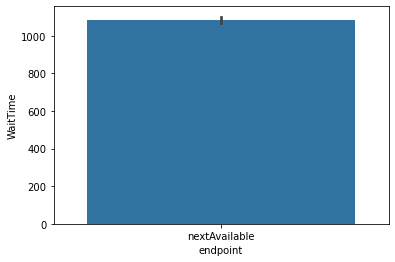

In [260]:
sns.barplot(x='endpoint',y='WaitTime',data=wait_Dart)

In [261]:
cols=['statusChanges', 'endpoint', 'processing','accepted', 'arriving', 'inProgress', 'completed', 'cancelled','noDriversAvailable', 'serviceDisruption']

In [262]:
wait_Dart=wait_Dart.drop(cols, axis=1)

In [263]:
wait_Dart

,requestedPickupTs,requestedDropoffTs,requestedPickupTsTimestamp,requestedDropoffTsTimestamp,requestedPickupLatitude,requestedPickupLongitude,requestedDropoffLatitude,requestedDropoffLongitude,serviceId,status,travelDistance,travelDuration,WaitTime
0,2020-04-21 17:34:19,2020-04-21 17:47:10,2020-04-21T10:34:19-07:00,2020-04-21T10:47:10-07:00,32.931741,-96.525914,32.904062,-96.564146,d0a57efd-e2cc-4a03-9ae6-fef917a74b76,completed,7325,771,881.0
1,2020-04-20 20:15:20,2020-04-20 20:27:54,2020-04-20T13:15:20-07:00,2020-04-20T13:27:54-07:00,32.890332,-96.531593,32.915535,-96.520184,d0a57efd-e2cc-4a03-9ae6-fef917a74b76,completed,5349,754,303.0
3,2020-04-22 11:40:35,2020-04-22 11:49:38,2020-04-22T04:40:35-07:00,2020-04-22T04:49:38-07:00,32.661913,-96.734318,32.654408,-96.801775,506997d2-b163-4b46-b977-b47f8fb0c4ff,cancelled,9305,543,1320.0
4,2019-08-07 11:48:47,2019-08-07 11:59:16,2019-08-07T04:48:47-07:00,2019-08-07T04:59:16-07:00,33.073095,-96.726008,33.033556,-96.701109,e40490b6-1d87-4dec-8b23-92632915008e,completed,7198,629,637.0
6,2019-08-06 19:41:49,2019-08-06 19:48:03,2019-08-06T12:41:49-07:00,2019-08-06T12:48:03-07:00,32.904062,-96.564146,32.914963,-96.573397,d0a57efd-e2cc-4a03-9ae6-fef917a74b76,completed,2099,374,363.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
272034,2019-08-06 21:53:43,2019-08-06 22:05:23,2019-08-06T14:53:43-07:00,2019-08-06T15:05:23-07:00,32.952905,-96.523778,32.911064,-96.569296,d0a57efd-e2cc-4a03-9ae6-fef917a74b76,completed,8182,700,1409.0
272037,2019-08-05 17:49:04,2019-08-05 17:53:34,2019-08-05T10:49:04-07:00,2019-08-05T10:53:34-07:00,33.080439,-96.826076,33.082890,-96.840141,e55c3fcf-1e9b-481a-bdc0-ef1944ef31e1,completed,1701,270,412.0
272038,2020-04-21 17:30:37,2020-04-21 17:41:50,2020-04-21T10:30:37-07:00,2020-04-21T10:41:50-07:00,32.917935,-96.517047,32.948804,-96.528164,d0a57efd-e2cc-4a03-9ae6-fef917a74b76,completed,5135,673,168.0
272039,2020-04-21 17:29:32,2020-04-21 17:35:41,2020-04-21T10:29:32-07:00,2020-04-21T10:35:41-07:00,33.047400,-96.710740,33.033573,-96.701112,e40490b6-1d87-4dec-8b23-92632915008e,completed,3224,369,299.0


In [264]:
wait_Dart=wait_Dart[wait_Dart.status.str.contains("completed")]

In [265]:
wait_Dart.status.unique()

array(['completed'], dtype=object)

In [266]:
wait_Dart=wait_Dart.drop('status',axis=1)

In [267]:
#we wont need year in our model, is time too granular? 
#we want to bring in gmaps api 
#Do we need to

In [268]:
wait_Dart.dtypes

requestedPickupTs              datetime64[ns]
requestedDropoffTs             datetime64[ns]
requestedPickupTsTimestamp             object
requestedDropoffTsTimestamp            object
requestedPickupLatitude               float64
requestedPickupLongitude              float64
requestedDropoffLatitude              float64
requestedDropoffLongitude             float64
serviceId                              object
travelDistance                          int64
travelDuration                          int64
WaitTime                              float64
dtype: object

In [269]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
wait_Dart.serviceId=le.fit_transform(wait_Dart.serviceId)

<AxesSubplot:xlabel='serviceId', ylabel='travelDistance'>

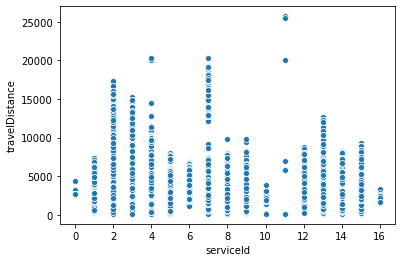

In [270]:
sns.scatterplot(x='serviceId',y='travelDistance',data=wait_Dart)

In [271]:
#wait_Dart.travelDistance.groupby(wait_Dart.serviceId).describe().sort_values(by=mean)

In [272]:
def time_decomp(data):
    data['Pikcuphour']=data.requestedPickupTs.dt.hour
    data['Pikcupminute']=data.requestedPickupTs.dt.minute
    data['drophour']=data.requestedDropoffTs.dt.hour
    data['dropminute']=data.requestedDropoffTs.dt.minute
    data['day']=data.requestedPickupTs.dt.dayofweek
    return(data)

In [273]:
time_decomp(wait_Dart)

,requestedPickupTs,requestedDropoffTs,requestedPickupTsTimestamp,requestedDropoffTsTimestamp,requestedPickupLatitude,requestedPickupLongitude,requestedDropoffLatitude,requestedDropoffLongitude,serviceId,travelDistance,travelDuration,WaitTime,Pikcuphour,Pikcupminute,drophour,dropminute,day
0,2020-04-21 17:34:19,2020-04-21 17:47:10,2020-04-21T10:34:19-07:00,2020-04-21T10:47:10-07:00,32.931741,-96.525914,32.904062,-96.564146,13,7325,771,881.0,17,34,17,47,1
1,2020-04-20 20:15:20,2020-04-20 20:27:54,2020-04-20T13:15:20-07:00,2020-04-20T13:27:54-07:00,32.890332,-96.531593,32.915535,-96.520184,13,5349,754,303.0,20,15,20,27,0
4,2019-08-07 11:48:47,2019-08-07 11:59:16,2019-08-07T04:48:47-07:00,2019-08-07T04:59:16-07:00,33.073095,-96.726008,33.033556,-96.701109,15,7198,629,637.0,11,48,11,59,2
6,2019-08-06 19:41:49,2019-08-06 19:48:03,2019-08-06T12:41:49-07:00,2019-08-06T12:48:03-07:00,32.904062,-96.564146,32.914963,-96.573397,13,2099,374,363.0,19,41,19,48,1
7,2019-08-06 19:36:38,2019-08-06 19:45:39,2019-08-06T12:36:38-07:00,2019-08-06T12:45:39-07:00,32.718280,-96.684454,32.670540,-96.660868,12,7379,541,358.0,19,36,19,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272030,2020-04-22 22:59:41,2020-04-22 23:05:01,2020-04-22T15:59:41-07:00,2020-04-22T16:05:01-07:00,33.056557,-96.697605,33.052897,-96.707741,15,2377,320,365.0,22,59,23,5,2
272034,2019-08-06 21:53:43,2019-08-06 22:05:23,2019-08-06T14:53:43-07:00,2019-08-06T15:05:23-07:00,32.952905,-96.523778,32.911064,-96.569296,13,8182,700,1409.0,21,53,22,5,1
272037,2019-08-05 17:49:04,2019-08-05 17:53:34,2019-08-05T10:49:04-07:00,2019-08-05T10:53:34-07:00,33.080439,-96.826076,33.082890,-96.840141,16,1701,270,412.0,17,49,17,53,0
272038,2020-04-21 17:30:37,2020-04-21 17:41:50,2020-04-21T10:30:37-07:00,2020-04-21T10:41:50-07:00,32.917935,-96.517047,32.948804,-96.528164,13,5135,673,168.0,17,30,17,41,1


In [274]:
wait_Dart

,requestedPickupTs,requestedDropoffTs,requestedPickupTsTimestamp,requestedDropoffTsTimestamp,requestedPickupLatitude,requestedPickupLongitude,requestedDropoffLatitude,requestedDropoffLongitude,serviceId,travelDistance,travelDuration,WaitTime,Pikcuphour,Pikcupminute,drophour,dropminute,day
0,2020-04-21 17:34:19,2020-04-21 17:47:10,2020-04-21T10:34:19-07:00,2020-04-21T10:47:10-07:00,32.931741,-96.525914,32.904062,-96.564146,13,7325,771,881.0,17,34,17,47,1
1,2020-04-20 20:15:20,2020-04-20 20:27:54,2020-04-20T13:15:20-07:00,2020-04-20T13:27:54-07:00,32.890332,-96.531593,32.915535,-96.520184,13,5349,754,303.0,20,15,20,27,0
4,2019-08-07 11:48:47,2019-08-07 11:59:16,2019-08-07T04:48:47-07:00,2019-08-07T04:59:16-07:00,33.073095,-96.726008,33.033556,-96.701109,15,7198,629,637.0,11,48,11,59,2
6,2019-08-06 19:41:49,2019-08-06 19:48:03,2019-08-06T12:41:49-07:00,2019-08-06T12:48:03-07:00,32.904062,-96.564146,32.914963,-96.573397,13,2099,374,363.0,19,41,19,48,1
7,2019-08-06 19:36:38,2019-08-06 19:45:39,2019-08-06T12:36:38-07:00,2019-08-06T12:45:39-07:00,32.718280,-96.684454,32.670540,-96.660868,12,7379,541,358.0,19,36,19,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272030,2020-04-22 22:59:41,2020-04-22 23:05:01,2020-04-22T15:59:41-07:00,2020-04-22T16:05:01-07:00,33.056557,-96.697605,33.052897,-96.707741,15,2377,320,365.0,22,59,23,5,2
272034,2019-08-06 21:53:43,2019-08-06 22:05:23,2019-08-06T14:53:43-07:00,2019-08-06T15:05:23-07:00,32.952905,-96.523778,32.911064,-96.569296,13,8182,700,1409.0,21,53,22,5,1
272037,2019-08-05 17:49:04,2019-08-05 17:53:34,2019-08-05T10:49:04-07:00,2019-08-05T10:53:34-07:00,33.080439,-96.826076,33.082890,-96.840141,16,1701,270,412.0,17,49,17,53,0
272038,2020-04-21 17:30:37,2020-04-21 17:41:50,2020-04-21T10:30:37-07:00,2020-04-21T10:41:50-07:00,32.917935,-96.517047,32.948804,-96.528164,13,5135,673,168.0,17,30,17,41,1


In [275]:
coords = wait_Dart[['requestedPickupLatitude', 'requestedPickupLongitude']].values

In [276]:
len(coords)

101551

In [277]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

kms_per_radian = 6371.0088
epsilon = 1.5 / kms_per_radian

# Run the DBSCAN from sklearn
db = DBSCAN(eps=epsilon, min_samples=5, algorithm='ball_tree', \
            metric='haversine').fit(np.radians(coords))

cluster_labels = db.labels_
n_clusters = len(set(cluster_labels))

# get the cluster
# cluster_labels = -1 means outliers
clusters = \
    pd.Series([coords[cluster_labels == n] for n in range(-1, n_clusters)])

In [278]:
cluster_labels = db.labels_
dbclus=pd.DataFrame(cluster_labels)

In [279]:
dbclus.columns=['cluster']

In [280]:
dropcoords=wait_Dart[['requestedDropoffLatitude', 'requestedDropoffLongitude']].values

In [281]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

kms_per_radian = 6371.0088
epsilon = 1.5 / kms_per_radian

# Run the DBSCAN from sklearn
dbdrp = DBSCAN(eps=epsilon, min_samples=5, algorithm='ball_tree', \
            metric='haversine').fit(np.radians(dropcoords))

drpcluster_labels = dbdrp.labels_
n_clusters = len(set(drpcluster_labels))

# get the cluster
# cluster_labels = -1 means outliers
drpclusters = \
    pd.Series([dropcoords[drpcluster_labels == n] for n in range(-1, n_clusters)])

In [282]:
n_clusters

18

In [283]:
dropcluster_labels = dbdrp.labels_


In [284]:
wait_Dart['pickupcluster']=cluster_labels

In [285]:
wait_Dart['dropoffcluster']=dropcluster_labels

In [377]:
wait_Dart

,travelDistance,travelDuration,WaitTime,Pikcupminute,drophour,dropminute,day,pickupcluster,dropoffcluster
0,7325,771,881.0,34,17,47,1,0,0
1,5349,754,303.0,15,20,27,0,0,0
4,7198,629,637.0,48,11,59,2,1,1
6,2099,374,363.0,41,19,48,1,0,0
7,7379,541,358.0,36,19,45,1,2,2
...,...,...,...,...,...,...,...,...,...
272030,2377,320,365.0,59,23,5,2,1,1
272034,8182,700,1409.0,53,22,5,1,0,0
272037,1701,270,412.0,49,17,53,0,1,1
272038,5135,673,168.0,30,17,41,1,0,0


In [287]:
wait_Dart=wait_Dart.drop(['requestedPickupTs','requestedDropoffTs','requestedPickupTsTimestamp', 'requestedDropoffTsTimestamp'],axis=1)


In [362]:
wait_Dart=wait_Dart.drop(['requestedPickupLatitude','requestedPickupLongitude'],axis=1)
wait_Dart=wait_Dart.drop(['requestedDropoffLatitude','requestedDropoffLongitude'],axis=1)
wait_Dart=wait_Dart.drop('serviceId',axis=1)
wait_Dart=wait_Dart.drop('Pikcuphour',axis=1)
X=wait_Dart.drop('WaitTime',axis=1)

y=wait_Dart.WaitTime
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [364]:
X

,travelDistance,travelDuration,Pikcupminute,drophour,dropminute,day,pickupcluster,dropoffcluster
0,7325,771,34,17,47,1,0,0
1,5349,754,15,20,27,0,0,0
4,7198,629,48,11,59,2,1,1
6,2099,374,41,19,48,1,0,0
7,7379,541,36,19,45,1,2,2
...,...,...,...,...,...,...,...,...
272030,2377,320,59,23,5,2,1,1
272034,8182,700,53,22,5,1,0,0
272037,1701,270,49,17,53,0,1,1
272038,5135,673,30,17,41,1,0,0


In [290]:
from sklearn.metrics import mean_squared_error

In [297]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 3, alpha = 10, n_estimators = 2000)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 2450.954000


In [298]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,preds)

735.7126767219337

In [299]:
mean_train = np.mean(y_train)
# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train
# Compute MAE
mae_baseline = mean_absolute_error(y_test, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))


Baseline MAE is 778.83


In [300]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [301]:
params['eval_metric'] = "mae"

In [302]:
num_boost_round = 999

In [304]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [305]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

[10:36:01] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:01] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:01] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:01] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:01] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,807.514026,3.450082,809.370911,19.219779
1,696.759241,3.718956,703.355871,19.064183
2,663.218897,3.987836,672.780420,17.759378
3,659.156799,4.305979,672.176416,16.851687


In [306]:
cv_results['test-mae-mean'].min()



672.176416

In [307]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [308]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))


CV with max_depth=9, min_child_weight=5
[10:38:16] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[10:38:16] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[10:38:16] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[10:38:16] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[10:38:17] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 669.711621 for 3 rounds
CV with max_depth=9, min_child_weight=6
[10:38:19] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederro

In [309]:
params['max_depth'] = 11
params['min_child_weight'] = 6

In [311]:
params['subsample'] = .8
params['colsample_bytree'] = 1.


In [312]:
params['eta'] = .01

In [316]:
params

{'max_depth': 11,
 'min_child_weight': 6,
 'eta': 0.01,
 'subsample': 0.8,
 'colsample_bytree': 1.0,
 'objective': 'reg:squarederror',
 'eval_metric': 'mae'}

In [315]:
params['objective']='reg:squarederror'

In [325]:
params['learning_rate'] = 0.15

In [376]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=20
)

[0]	Test-mae:936.26239
Will train until Test-mae hasn't improved in 20 rounds.
[1]	Test-mae:832.50946
[2]	Test-mae:761.54980
[3]	Test-mae:713.62738
[4]	Test-mae:686.33728
[5]	Test-mae:668.66571
[6]	Test-mae:660.65454
[7]	Test-mae:657.71808
[8]	Test-mae:658.22125
[9]	Test-mae:661.23767
[10]	Test-mae:664.50128
[11]	Test-mae:667.90875
[12]	Test-mae:671.82648
[13]	Test-mae:675.50964
[14]	Test-mae:680.15637
[15]	Test-mae:686.23566
[16]	Test-mae:689.81781
[17]	Test-mae:693.68420
[18]	Test-mae:695.70374
[19]	Test-mae:698.51276
[20]	Test-mae:701.18426
[21]	Test-mae:705.12579
[22]	Test-mae:705.95062
[23]	Test-mae:706.97968
[24]	Test-mae:708.01215
[25]	Test-mae:708.73279
[26]	Test-mae:710.72809
[27]	Test-mae:712.17285
Stopping. Best iteration:
[7]	Test-mae:657.71808



In [ ]:
model.

In [53]:
from sklearn.preprocessing import MinMaxScaler

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from math import sqrt
from numpy import concatenate
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_squared_error

In [85]:
scalar = MinMaxScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
# define and fit the final model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train, y_train, epochs=200, verbose=0)

ValueError: in user code:

    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 2 but received input with shape [None, 5]


In [329]:
import matplotlib.pyplot as plt


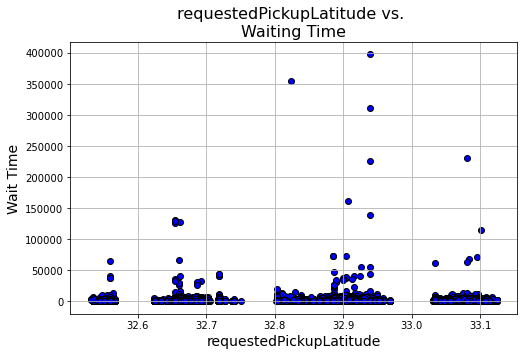

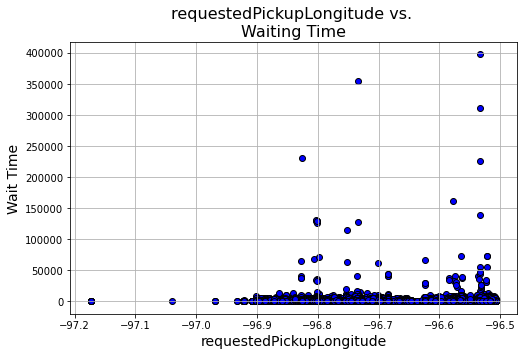

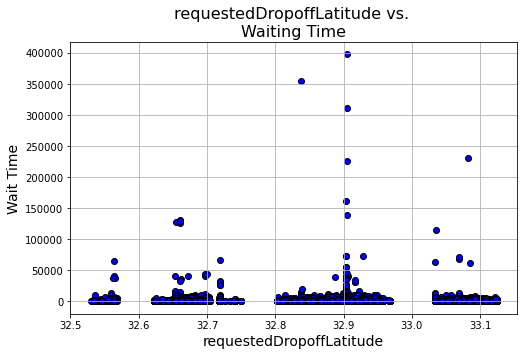

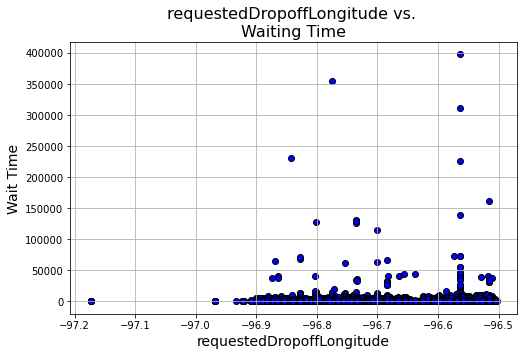

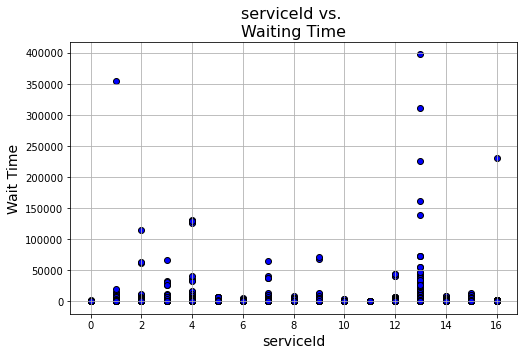

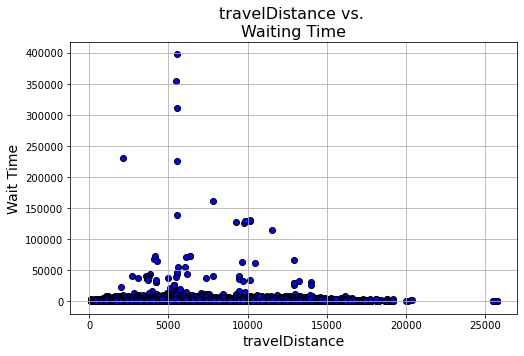

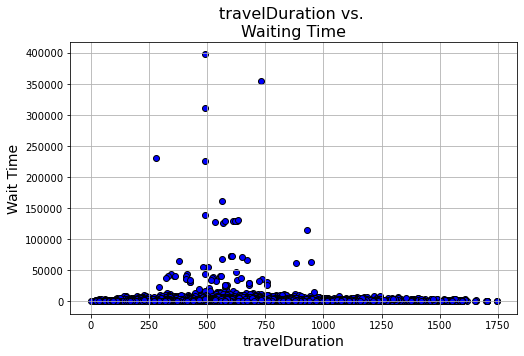

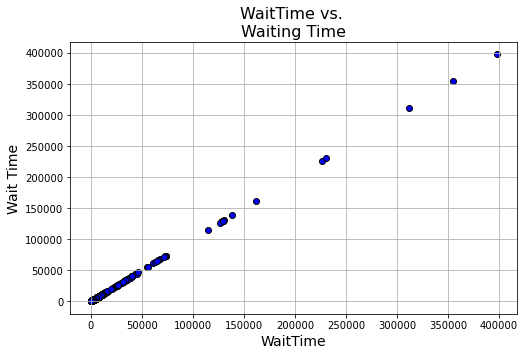

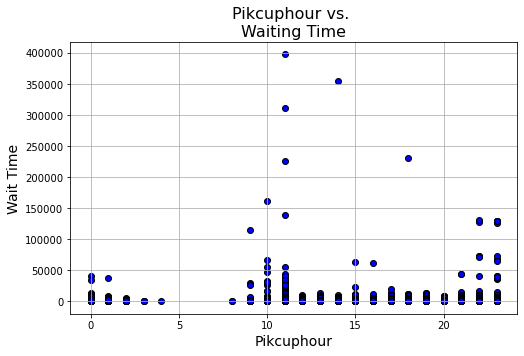

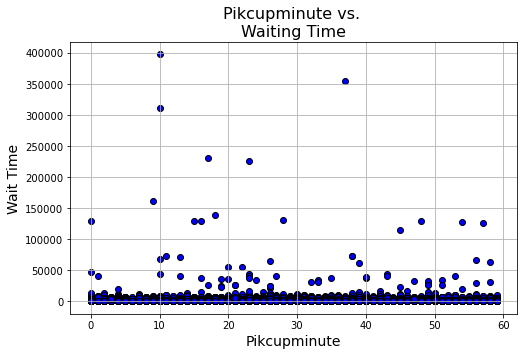

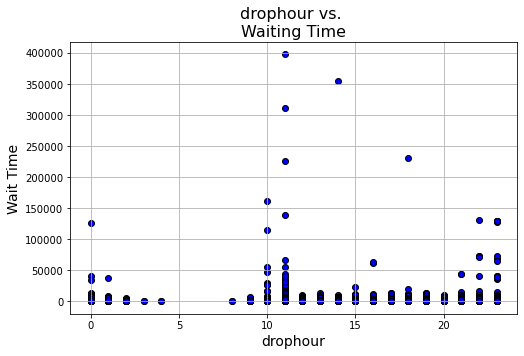

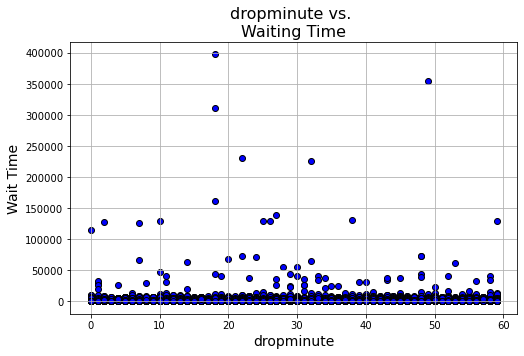

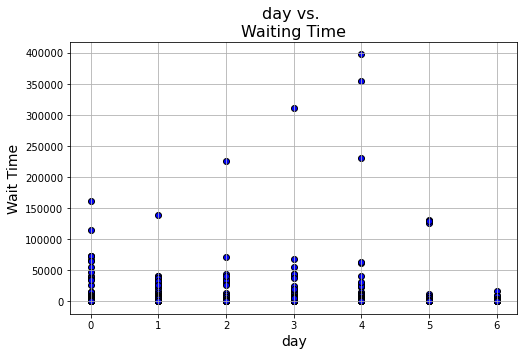

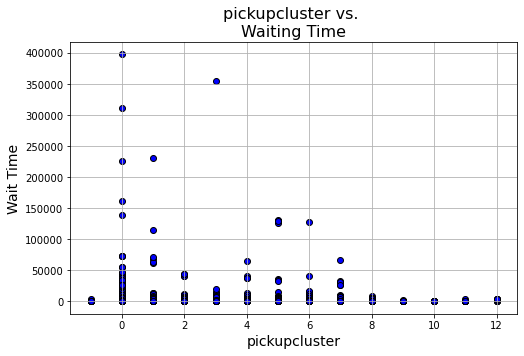

In [333]:
for c in wait_Dart.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nWaiting Time".format(c),fontsize=16)
    plt.scatter(x=wait_Dart[c],y=wait_Dart['WaitTime'],color='blue',edgecolor='k')
    plt.grid(True)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Wait Time',fontsize=14)
    plt.show()

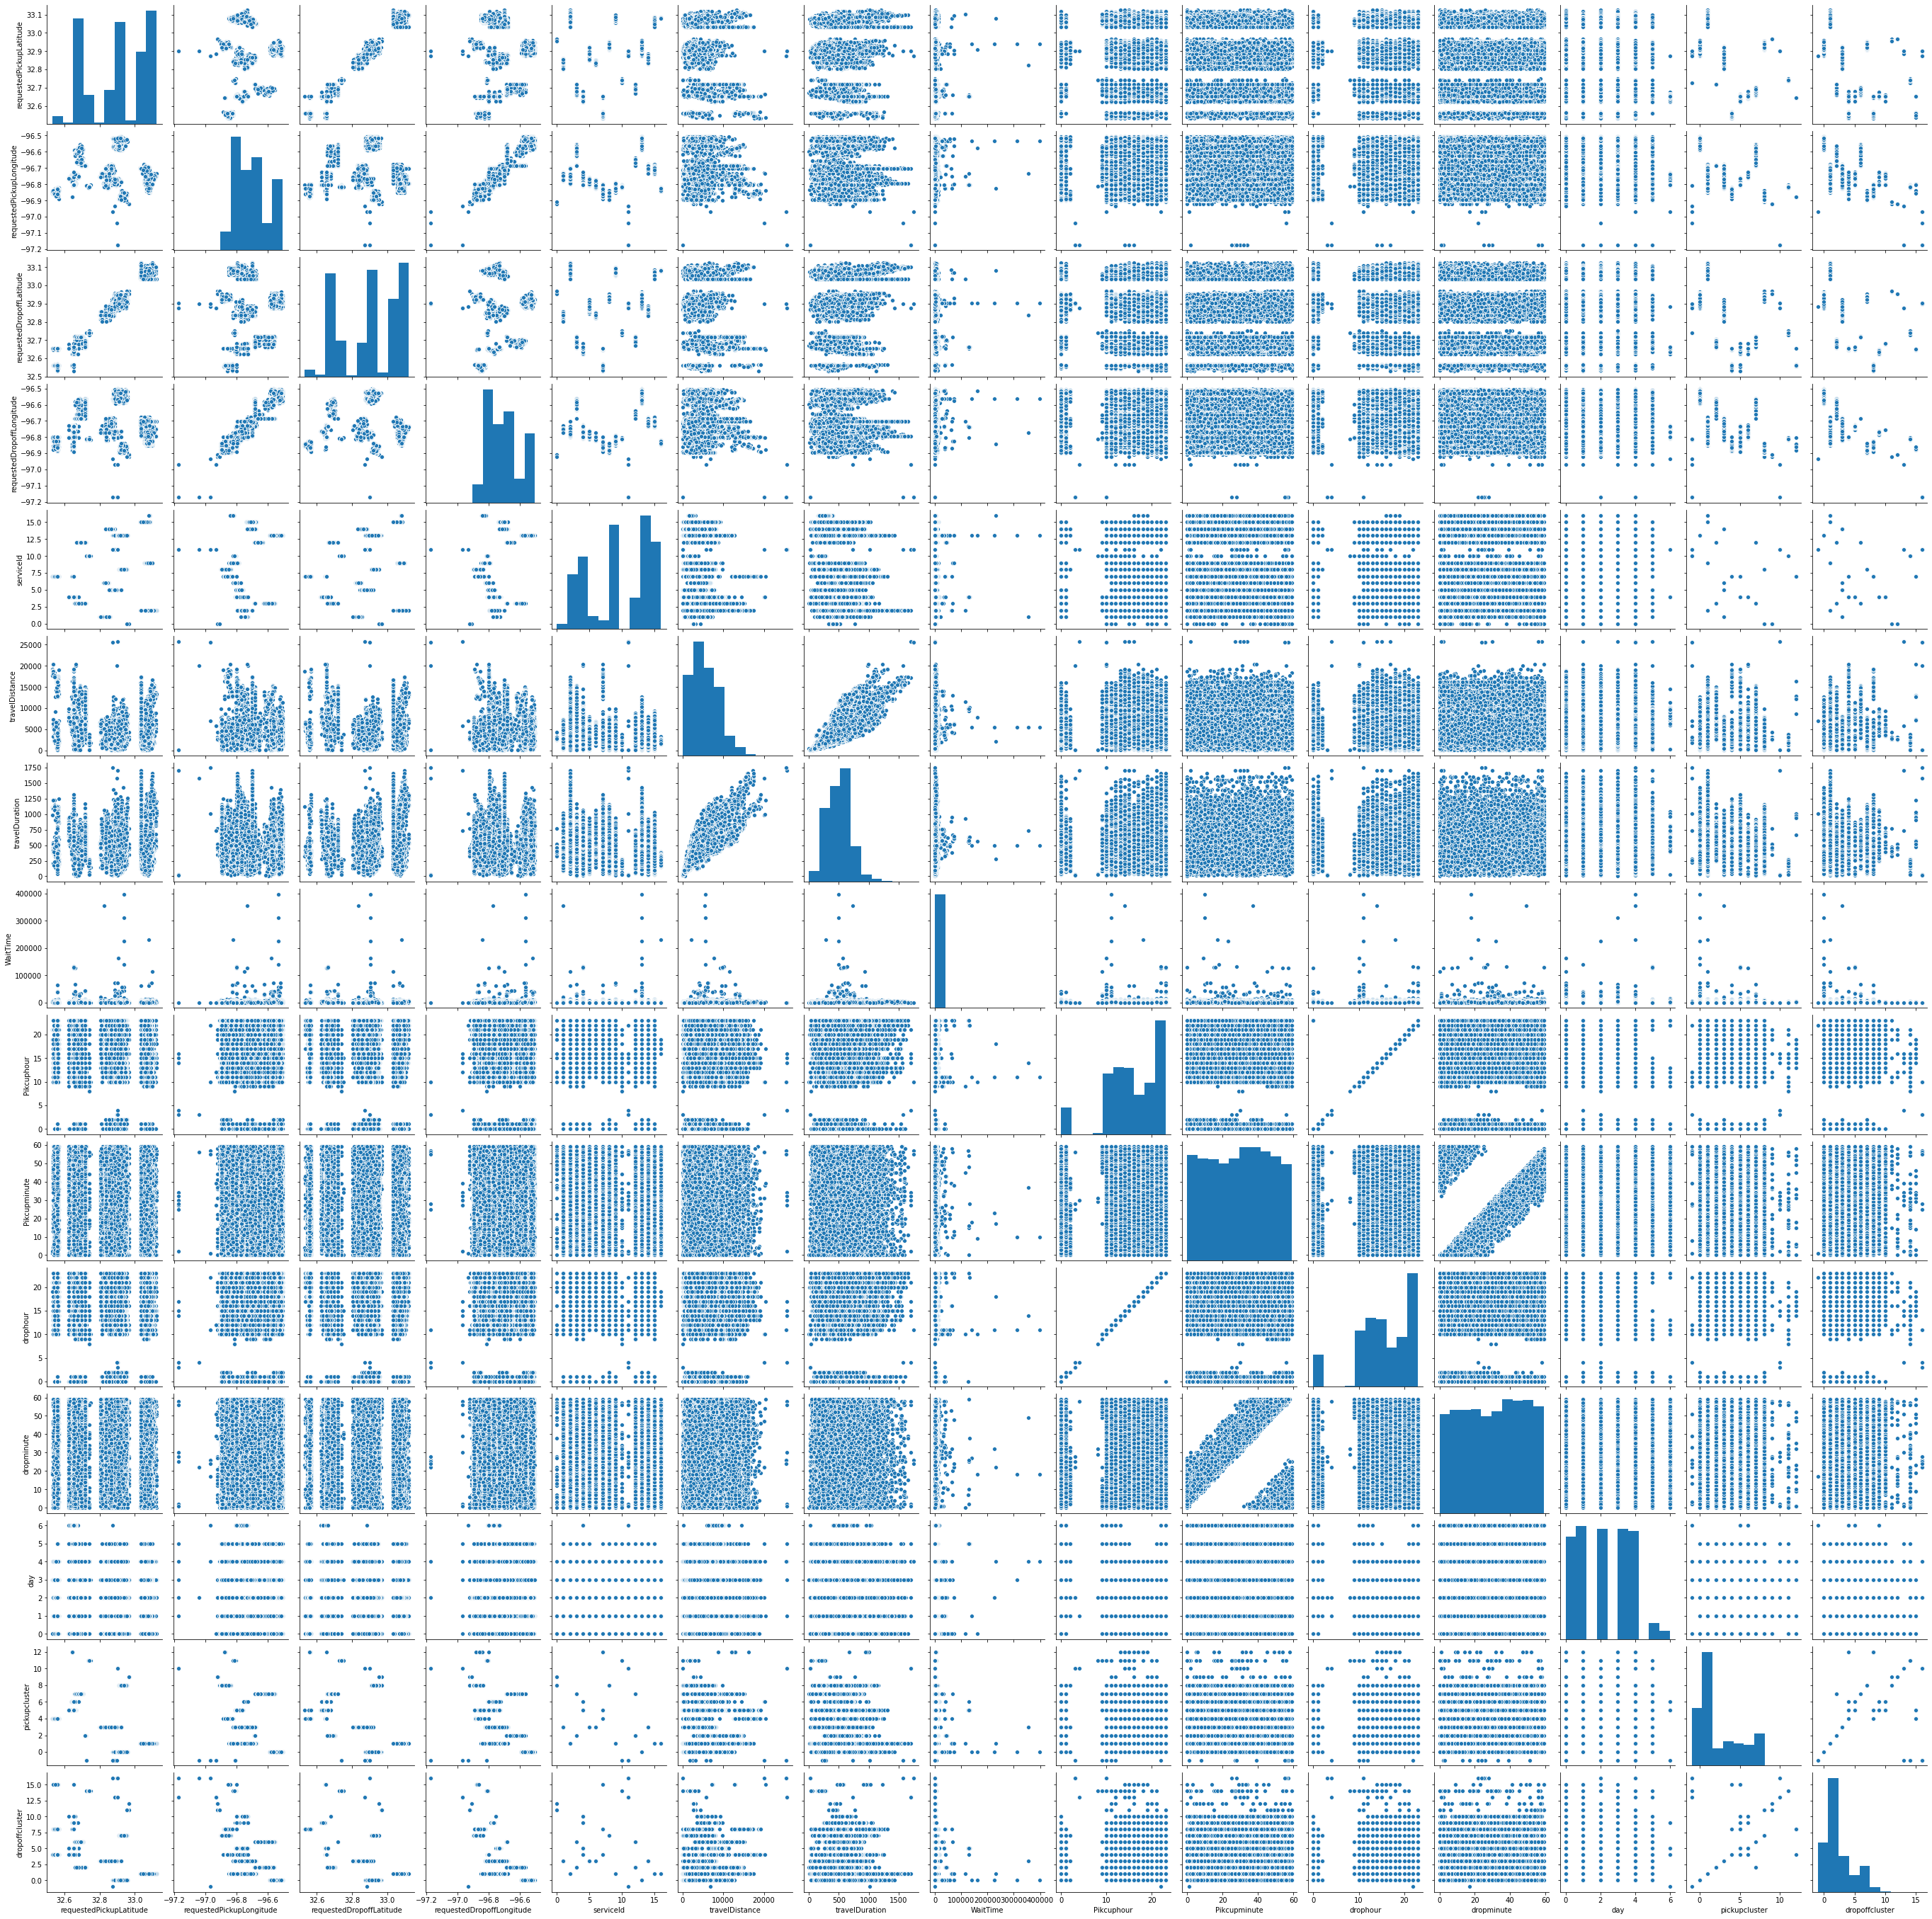

In [334]:
from seaborn import pairplot
pairplot(wait_Dart)

In [338]:
corr = X[:-1].corr()


In [339]:
from statsmodels.graphics.correlation import plot_corr

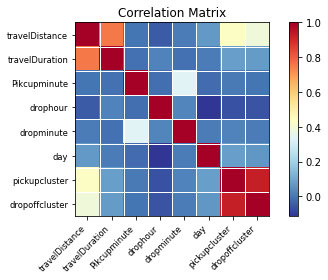

In [340]:
fig=plot_corr(corr,xnames=corr.columns)


In [344]:
import statsmodels.formula.api as sm


In [ ]:
formula_str = X.columns[-1]+' ~ '+'+'.join(df1.columns[:-1])


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

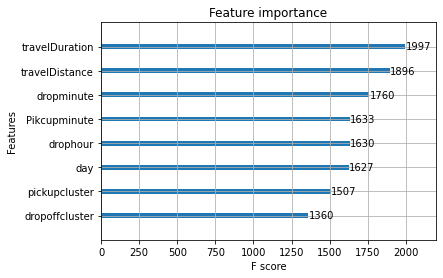

In [229]:
xgb.plot_importance(xg_reg)


In [48]:
####################################
#try with clusters
dart=pd.read_csv('/Users/jacklobe/lighthouse/Final/clustered_CSV/dallas_kmeans.csv')

In [49]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [50]:
dart.drop(dart.columns[dart.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


In [51]:
dart.columns

Index(['requestedPickupTs', 'requestedDropoffTs', 'requestedPickupLatitude',
       'requestedPickupLongitude', 'requestedDropoffLatitude',
       'requestedDropoffLongitude', 'serviceId', 'status', 'travelDistance',
       'travelDuration', 'endpoint', 'FIPS', 'POPULATION', 'POP_SQMI',
       'POP2010', 'POP10_SQMI', 'WHITE', 'BLACK', 'AMERI_ES', 'ASIAN',
       'HAWN_PI', 'HISPANIC', 'OTHER', 'MULT_RACE', 'MALES', 'FEMALES',
       'AGE_UNDER5', 'AGE_5_9', 'AGE_10_14', 'AGE_15_19', 'AGE_20_24',
       'AGE_25_34', 'AGE_35_44', 'AGE_45_54', 'AGE_55_64', 'AGE_65_74',
       'AGE_75_84', 'AGE_85_UP', 'MED_AGE', 'MED_AGE_M', 'MED_AGE_F',
       'HOUSEHOLDS', 'AVE_HH_SZ', 'HSEHLD_1_M', 'HSEHLD_1_F', 'MARHH_CHD',
       'MARHH_NO_C', 'MHH_CHILD', 'FHH_CHILD', 'FAMILIES', 'AVE_FAM_SZ',
       'HSE_UNITS', 'VACANT', 'OWNER_OCC', 'RENTER_OCC', 'SQMI', 'Shape_Leng',
       'Shape__Area', 'Shape__Length', 'processing', 'accepted', 'arriving',
       'inProgress', 'completed', 'cancelled', 'noDr

In [52]:
dart = dart.dropna(axis=0, subset=['completed'])


KeyboardInterrupt: 

In [ ]:
dart=dart.drop(['POP2010', 'POP10_SQMI', 'WHITE', 'BLACK', 'AMERI_ES', 'ASIAN',
       'HAWN_PI', 'HISPANIC', 'OTHER', 'MULT_RACE', 'MALES', 'FEMALES',
       'AGE_UNDER5', 'AGE_5_9', 'AGE_10_14', 'AGE_15_19', 'AGE_20_24',
       'AGE_25_34', 'AGE_35_44', 'AGE_45_54', 'AGE_55_64', 'AGE_65_74',
       'AGE_75_84', 'AGE_85_UP', 'MED_AGE', 'MED_AGE_M', 'MED_AGE_F',
       'HOUSEHOLDS', 'AVE_HH_SZ', 'HSEHLD_1_M', 'HSEHLD_1_F', 'MARHH_CHD',
       'MARHH_NO_C', 'MHH_CHILD', 'FHH_CHILD', 'FAMILIES', 'AVE_FAM_SZ',
       'HSE_UNITS', 'VACANT', 'OWNER_OCC', 'RENTER_OCC', 'SQMI', 'Shape_Leng',
       'Shape__Area', 'Shape__Length', 'processing', 'accepted', 'arriving',
       'inProgress', 'completed', 'cancelled', 'noDriversAvailable',
       'serviceDisruption'],axis=1)

In [ ]:
dart.columns

In [ ]:
dart.requestedPickupTs = pd.to_datetime(dart.requestedPickupTs, infer_datetime_format=True)
dart.requestedDropoffTs = pd.to_datetime(dart.requestedDropoffTs, infer_datetime_format=True)


In [ ]:
dart['weekday'] = dart.requestedPickupTs.dt.day_name()
dart['month'] = dart.requestedPickupTs.dt.month
dart['day'] = dart.requestedPickupTs.dt.day
dart['hour'] = dart.requestedPickupTs.dt.hour
dart['minute'] = dart.requestedPickupTs.dt.minute

In [ ]:
dart=dart.drop(['requestedPickupTs', 'requestedDropoffTs'],axis=1)

In [ ]:
dart=dart.drop(['status'],axis=1)

In [ ]:
dart.columns

In [ ]:
le=LabelEncoder()

In [ ]:
dart.serviceId=le.fit_transform(dart.serviceId)
dart.endpoint=le.fit_transform(dart.endpoint)
dart.weekday=le.fit_transform(dart.weekday)

In [ ]:
#lets try taking out lat long as the clusters and FIPS have the data within them
import copy
jjbean=copy.copy(dart)

In [ ]:
jjbean=jjbean.drop(['requestedPickupLatitude', 'requestedPickupLongitude',
       'requestedDropoffLatitude', 'requestedDropoffLongitude'],axis=1)

In [ ]:
jjbean.serviceId=jjbean.serviceId.astype('float')
jjbean.dtypes
jjbean.travelDistance=jjbean.travelDistance.astype('float')
jjbean.travelDuration=jjbean.travelDuration.astype('float')
jjbean.endpoint=jjbean.endpoint.astype('float')
jjbean.FIPS=jjbean.FIPS.astype('float')
jjbean.POPULATION=jjbean.POPULATION.astype('float')
jjbean.clusters=jjbean.clusters.astype('float')          
jjbean.weekday=jjbean.weekday.astype('float')   
jjbean.month= jjbean.month.astype('float')                
jjbean.day= jjbean.day.astype('float')                   
jjbean.hour=  jjbean.hour.astype('float')                
jjbean.minute=jjbean.minute.astype('float')          

In [ ]:
jjbean.dtypes

In [ ]:
X=dart.drop('Difference',axis=1)
X=X.drop(['FIPS','serviceId','POP_SQMI','Prop_Hispanic','clusters','endpoint','Prop_Asian','requestedPickupLongitude','requestedPickupLatitude','travelDistance','hour'],axis=1)
y=dart.Difference
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
xgb.plot_importance(xg_reg)



In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.05,
                max_depth = 30, alpha = 0, n_estimators = 600)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

In [357]:
wait_Dart

,requestedPickupLatitude,requestedPickupLongitude,requestedDropoffLatitude,requestedDropoffLongitude,serviceId,travelDistance,travelDuration,WaitTime,Pikcuphour,Pikcupminute,drophour,dropminute,day,pickupcluster,dropoffcluster
0,32.931741,-96.525914,32.904062,-96.564146,13,7325,771,881.0,17,34,17,47,1,0,0
1,32.890332,-96.531593,32.915535,-96.520184,13,5349,754,303.0,20,15,20,27,0,0,0
4,33.073095,-96.726008,33.033556,-96.701109,15,7198,629,637.0,11,48,11,59,2,1,1
6,32.904062,-96.564146,32.914963,-96.573397,13,2099,374,363.0,19,41,19,48,1,0,0
7,32.718280,-96.684454,32.670540,-96.660868,12,7379,541,358.0,19,36,19,45,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272030,33.056557,-96.697605,33.052897,-96.707741,15,2377,320,365.0,22,59,23,5,2,1,1
272034,32.952905,-96.523778,32.911064,-96.569296,13,8182,700,1409.0,21,53,22,5,1,0,0
272037,33.080439,-96.826076,33.082890,-96.840141,16,1701,270,412.0,17,49,17,53,0,1,1
272038,32.917935,-96.517047,32.948804,-96.528164,13,5135,673,168.0,17,30,17,41,1,0,0


In [360]:
wait_Dart.groupby(['requestedDropoffLatitude','requestedDropoffLongitude']).count()


,,requestedPickupLatitude,requestedPickupLongitude,serviceId,travelDistance,travelDuration,WaitTime,Pikcuphour,Pikcupminute,drophour,dropminute,day,pickupcluster,dropoffcluster
requestedDropoffLatitude,requestedDropoffLongitude,,,,,,,,,,,,,
32.529670,-96.854888,1,1,1,1,1,1,1,1,1,1,1,1,1
32.531213,-96.841507,1,1,1,1,1,1,1,1,1,1,1,1,1
32.531940,-96.856632,1,1,1,1,1,1,1,1,1,1,1,1,1
32.534290,-96.851223,1,1,1,1,1,1,1,1,1,1,1,1,1
32.534303,-96.852760,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33.122077,-96.736437,1,1,1,1,1,1,1,1,1,1,1,1,1
33.122119,-96.736747,7,7,7,7,7,7,7,7,7,7,7,7,7
33.123537,-96.734144,1,1,1,1,1,1,1,1,1,1,1,1,1


In [368]:
wait_Dart

,travelDistance,travelDuration,WaitTime,Pikcupminute,drophour,dropminute,day,pickupcluster,dropoffcluster
0,7325,771,881.0,34,17,47,1,0,0
1,5349,754,303.0,15,20,27,0,0,0
4,7198,629,637.0,48,11,59,2,1,1
6,2099,374,363.0,41,19,48,1,0,0
7,7379,541,358.0,36,19,45,1,2,2
...,...,...,...,...,...,...,...,...,...
272030,2377,320,365.0,59,23,5,2,1,1
272034,8182,700,1409.0,53,22,5,1,0,0
272037,1701,270,412.0,49,17,53,0,1,1
272038,5135,673,168.0,30,17,41,1,0,0


In [369]:
X_train = np.array(X_train).reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = np.array(X_test).reshape(X_test.shape[0], 1, X_test.shape[1])
X_train.shape,X_test.shape

((81240, 1, 8), (20311, 1, 8))

In [375]:
_optimiser = ['Adam','Nadam','RMSprop']
model = Sequential()
model.add(LSTM(144, batch_input_shape=(1, 1, 8), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=_optimiser[0])
model.summary()
model.fit(X_train,y_train, batch_size=16,epochs=1000)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (1, 144)                  88128     
_________________________________________________________________
dense_7 (Dense)              (1, 1)                    145       
Total params: 88,273
Trainable params: 88,273
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
5078/5078 [==============================] - 8s 2ms/step - loss: 8550597.0000A: 1s - loss: - ETA: 
Epoch 2/1000
5078/5078 [==============================] - 8s 1ms/step - loss: 8041284.0000A
Epoch 3/1000
5078/5078 [==============================] - 8s 2ms/step - loss: 7833411.5000
Epoch 4/1000
5078/5078 [==============================] - 7s 1ms/step - loss: 7778498.0000
Epoch 5/1000
5078/5078 [==============================] - 8s 1ms/step - loss: 7765373.0000
Epoch 6/1000
5078/5078 [===========

KeyboardInterrupt: 

In [ ]:
#Scale data between 0,1 for LSTM/GRU
MMS = MinMaxScaler()
uber = pd.DataFrame(MMS.fit_transform(uber), columns=uber.columns)

#  Remember to shift the data so we are predicting one time step future
X = uber.iloc[:-1,:]
y = uber.iloc[1:,-263:] #263 locationIDs

# Train-Test-Split-90/10
X_train, X_test = X[:int(round(len(X)*0.8, 0))], X[int(round(len(X)*0.8, 0)):]
y_train, y_test = y[:int(round(len(y)*0.8, 0))], y[int(round(len(y)*0.8, 0)):]

#Reshape for LSTM/GRU layers
Xtr = X_train.values.reshape((1, X_train.shape[0], X_train.shape[1]))
ytr = y_train.values.reshape((1, y_train.shape[0], y_train.shape[1]))
Xte = X_test.values.reshape((1, X_test.shape[0], X_test.shape[1]))
yte = y_test.values.reshape((1, y_test.shape[0], y_test.shape[1]))

#Check data validity
print len(X_train) + len(X_test), len(y_train) + len(y_test)

In [378]:
wait_Dart

,travelDistance,travelDuration,WaitTime,Pikcupminute,drophour,dropminute,day,pickupcluster,dropoffcluster
0,7325,771,881.0,34,17,47,1,0,0
1,5349,754,303.0,15,20,27,0,0,0
4,7198,629,637.0,48,11,59,2,1,1
6,2099,374,363.0,41,19,48,1,0,0
7,7379,541,358.0,36,19,45,1,2,2
...,...,...,...,...,...,...,...,...,...
272030,2377,320,365.0,59,23,5,2,1,1
272034,8182,700,1409.0,53,22,5,1,0,0
272037,1701,270,412.0,49,17,53,0,1,1
272038,5135,673,168.0,30,17,41,1,0,0


In [ ]:
#####################################################

In [379]:
wait_Dart

,travelDistance,travelDuration,WaitTime,Pikcupminute,drophour,dropminute,day,pickupcluster,dropoffcluster
0,7325,771,881.0,34,17,47,1,0,0
1,5349,754,303.0,15,20,27,0,0,0
4,7198,629,637.0,48,11,59,2,1,1
6,2099,374,363.0,41,19,48,1,0,0
7,7379,541,358.0,36,19,45,1,2,2
...,...,...,...,...,...,...,...,...,...
272030,2377,320,365.0,59,23,5,2,1,1
272034,8182,700,1409.0,53,22,5,1,0,0
272037,1701,270,412.0,49,17,53,0,1,1
272038,5135,673,168.0,30,17,41,1,0,0
